# House Sales in King County, USA

## 1. Data Description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It includes
19 house features plus the price and the id columns, along with 21613 observations.
(https://www.kaggle.com/harlfoxem/housesalesprediction)

Columns
1. id: Unique ID for each house sold 
2. date: Date house was sold 
3. price: Price of each house sold， prediction target
4. bedrooms: Number of bedrooms/House 
5. bathrooms: Number of bathrooms/House, where .5 accounts for a room with a toilet but no shower 
6. sqft_living: Square footage of the house 
7. sqft_lot: Square footage of the lot 
8. floors: Number of total floors (levels) in house
9. waterfront: A dummy variable for whether the House has a view to a waterfront
10. view: An index from 0 to 4 of how good the view of the property was 
11. condition: How good the condition is ( Overall ). An index from 1 to 5 on the condition of the house
12. grade: Overall grade given to the housing unit, based on King County grading system. An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 
13. sqft_above: The square footage of the interior housing space that is above ground level 
14. sqft_basement: The square footage of the interior housing space that is below ground level 
15. yr_built: The year the house was initially built 
16. yr_renovated: The year of the house’s last renovation 
17. zipcode: What zipcode area the house is in 
18. lat: Lattitude coordinate
19. long: Longitude coordinate
20. sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors 
21. sqft_lot15: The square footage of the land lots of the nearest 15 neighbors 

In [1]:
import pandas as pd
import numpy as np

#Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Machine Leanring Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_raw = pd.read_csv('./kc_house_data.csv')
house = house_raw.copy(deep = True)
house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [4]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

# 2. Clean Data

In [5]:
#Drop colomns
#'id': no use for predicting the house price
#'zipcode', 'lat', 'long': will create a new fearture by clustering these geo-location features later
house.drop(['id'], axis=1, inplace = True)

In [6]:
#Check missing values
print('Check missing values:\n', house.isnull().sum())

Check missing values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


No missing values in the data. 

In [7]:
#Convert date from object to datetime
house['date'] = pd.to_datetime(house.date) 

In [8]:
#Create new columns: 'year' and 'month' of the sale
house.insert(loc=1, column='year', value=house['date'].dt.year)
house.insert(loc=2, column='month', value=house['date'].dt.month)

In [9]:
#Create new column 'yr_old' to replace 'yr_renovated'
house['yr_old'] = house['year'] - np.maximum(house['yr_built'], house['yr_renovated'])
house.drop(['yr_renovated'], axis=1, inplace = True)

In [10]:
#Create new logarithm features to reduce right skewness, which will be shown in EDA part
to_log = ['sqft_living', 'sqft_lot', 'sqft_above', 
           'sqft_living15', 'sqft_lot15', 'price']
new_col = ['log_sqft_living', 'log_sqft_lot', 'log_sqft_above', 
           'log_sqft_living15', 'log_sqft_lot15', 'log_price']
house[new_col] = np.log(house[to_log])

In [11]:
house['log_sqft_basement'] = np.log(np.maximum(house['sqft_basement'],1)) #if 'sqft_basement' is 0, set 1

In [12]:
#Check the new data frame
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 29 columns):
date                 21613 non-null datetime64[ns]
year                 21613 non-null int64
month                21613 non-null int64
price                21613 non-null float64
bedrooms             21613 non-null int64
bathrooms            21613 non-null float64
sqft_living          21613 non-null int64
sqft_lot             21613 non-null int64
floors               21613 non-null float64
waterfront           21613 non-null int64
view                 21613 non-null int64
condition            21613 non-null int64
grade                21613 non-null int64
sqft_above           21613 non-null int64
sqft_basement        21613 non-null int64
yr_built             21613 non-null int64
zipcode              21613 non-null int64
lat                  21613 non-null float64
long                 21613 non-null float64
sqft_living15        21613 non-null int64
sqft_lot15           21613 non-n

In [13]:
house.describe()

year         month         price      bedrooms     bathrooms  \
count  21613.000000  21613.000000  2.161300e+04  21613.000000  21613.000000   
mean    2014.322954      6.574423  5.400881e+05      3.370842      2.114757   
std        0.467616      3.115308  3.671272e+05      0.930062      0.770163   
min     2014.000000      1.000000  7.500000e+04      0.000000      0.000000   
25%     2014.000000      4.000000  3.219500e+05      3.000000      1.750000   
50%     2014.000000      6.000000  4.500000e+05      3.000000      2.250000   
75%     2015.000000      9.000000  6.450000e+05      4.000000      2.500000   
max     2015.000000     12.000000  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

       ...  sqft_living15     sqft_lot15        yr_old  log_sqft_living  \
count  ...   21613.000000   21613.000000  21613.000000     21613.000000   
mean   ...    1986.552492   12768.455652     40.936936         7.550335   
std    ...     685.391304   27304.179631     28.813643         0.424807   
min    ...     399.000000     651.000000     -1.000000         5.669881   
25%    ...    1490.000000    5100.000000     15.000000         7.263330   
50%    ...    1840.000000    7620.000000     37.000000         7.554859   
75%    ...    2360.000000   10083.000000     60.000000         7.843849   
max    ...    6210.000000  871200.000000    115.000000         9.513404   

       log_sqft_lot  log_sqft_above  log_sqft_living15  log_sqft_lot15  \
count  21613.000000    21613.000000       21613.000000    21613.000000   
mean       8.989956        7.394877           7.539440        8.960984   
std        0.902425        0.427631           0.327515        0.813048   
min        6.253829        5.669881           5.988961        6.478510   
25%        8.525161        7.081709           7.306531        8.536996   
50%        8.938269        7.352441           7.517521        8.938532   
75%        9.276877        7.700748           7.766417        9.218606   
max       14.317109        9.149528           8.733916       13.677627   

          log_price  log_sqft_basement  
count  21613.000000       21613.000000  
mean      13.047817           2.528485  
std        0.526685           3.169773  
min       11.225243           0.000000  
25%       12.682152           0.000000  
50%       13.017003           0.000000  
75%       13.377006           6.327937  
max       15.856731           8.480529  

[8 rows x 28 columns]

# 3. Split Training and Testing Data

In [14]:
target = 'log_price'
features = house.keys().drop('log_price')

In [15]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(house[features], house[target], test_size=0.2, random_state = 0)

In [16]:
print("Training Data Shape: {}".format(train_x.shape))
print("Training Target Shape: {}".format(train_y.shape))
print("Testing Data Shape: {}".format(test_x.shape))
print("Testing Taget Shape: {}".format(test_y.shape))

Training Data Shape: (17290, 28)
Training Target Shape: (17290,)
Testing Data Shape: (4323, 28)
Testing Taget Shape: (4323,)


# 4. Exploratory Data Analysis 

In [17]:
train_data = train_x.copy(deep = True)
#train_data['log_price'] = train_y
train_data.insert(loc=1, column='log_price', value=train_y)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 5268 to 2732
Data columns (total 29 columns):
date                 17290 non-null datetime64[ns]
log_price            17290 non-null float64
year                 17290 non-null int64
month                17290 non-null int64
price                17290 non-null float64
bedrooms             17290 non-null int64
bathrooms            17290 non-null float64
sqft_living          17290 non-null int64
sqft_lot             17290 non-null int64
floors               17290 non-null float64
waterfront           17290 non-null int64
view                 17290 non-null int64
condition            17290 non-null int64
grade                17290 non-null int64
sqft_above           17290 non-null int64
sqft_basement        17290 non-null int64
yr_built             17290 non-null int64
zipcode              17290 non-null int64
lat                  17290 non-null float64
long                 17290 non-null float64
sqft_living15        17290 n

Text(0.5, 0, 'Log of sqft_lot')

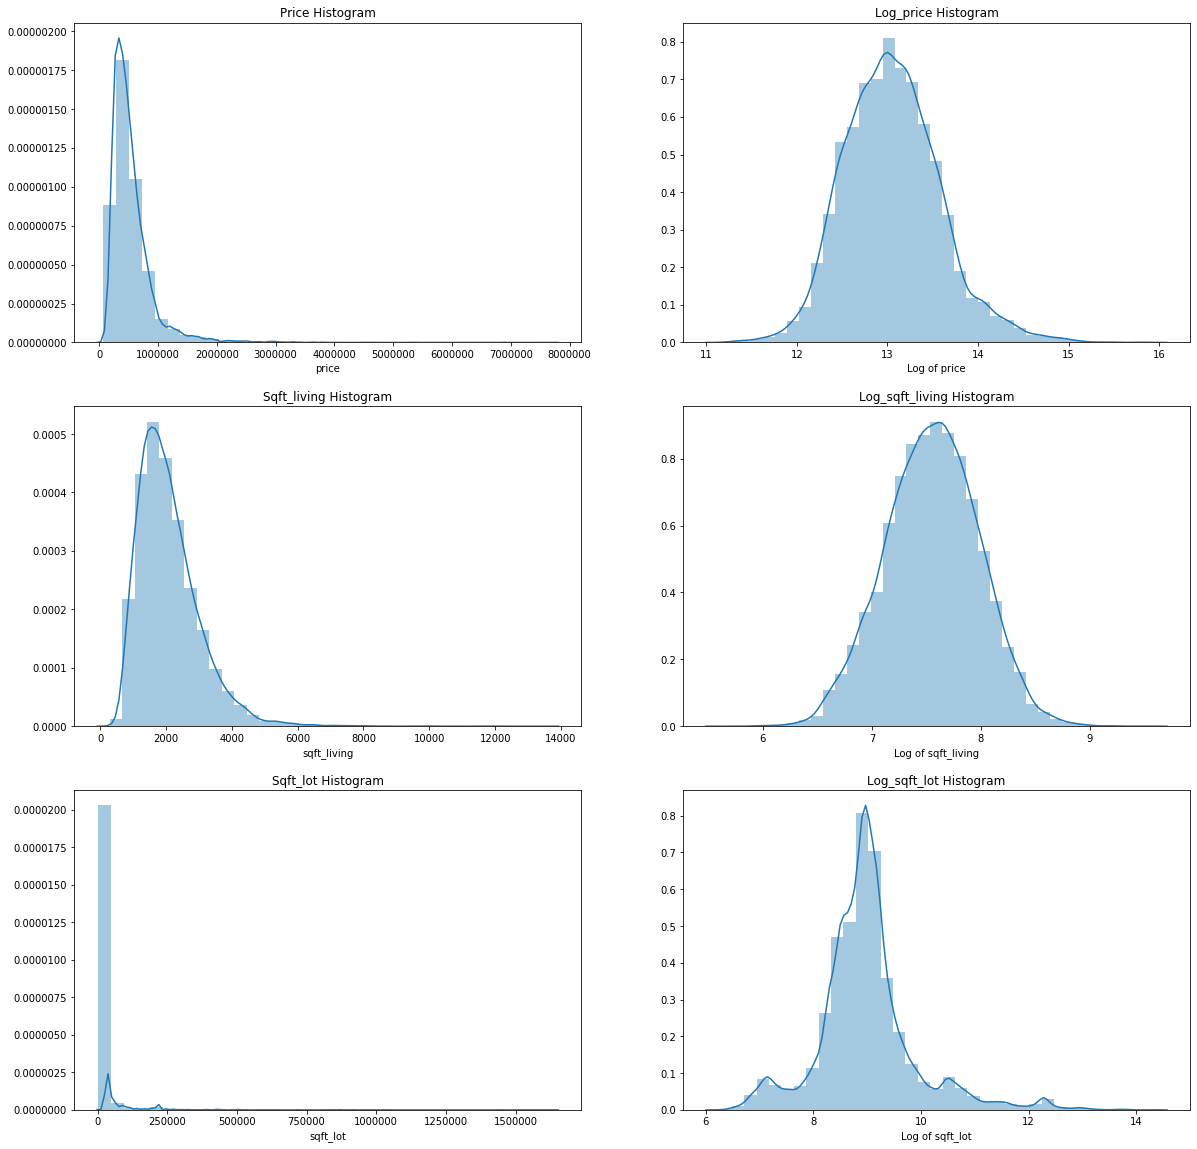

In [18]:
#Histgram and Density Curve 
#Right skewness reduced by logarithm
plt.figure(figsize=[20,20])

plt.subplot(321)
sns.distplot(train_data['price'], bins=35)
plt.title('Price Histogram')
plt.xlabel('price')

plt.subplot(322)
sns.distplot(train_data['log_price'], bins=35)
plt.title('Log_price Histogram')
plt.xlabel('Log of price')

plt.subplot(323)
sns.distplot(train_data['sqft_living'], bins=35)
plt.title('Sqft_living Histogram')
plt.xlabel('sqft_living')

plt.subplot(324)
sns.distplot(train_data['log_sqft_living'], bins=35)
plt.title('Log_sqft_living Histogram')
plt.xlabel('Log of sqft_living')

plt.subplot(325)
sns.distplot(train_data['sqft_lot'], bins=35)
plt.title('Sqft_lot Histogram')
plt.xlabel('sqft_lot')

plt.subplot(326)
sns.distplot(train_data['log_sqft_lot'], bins=35)
plt.title('Log_sqft_lot Histogram')
plt.xlabel('Log of sqft_lot')

Text(0.5, 0, 'Log of sqft_lot15')

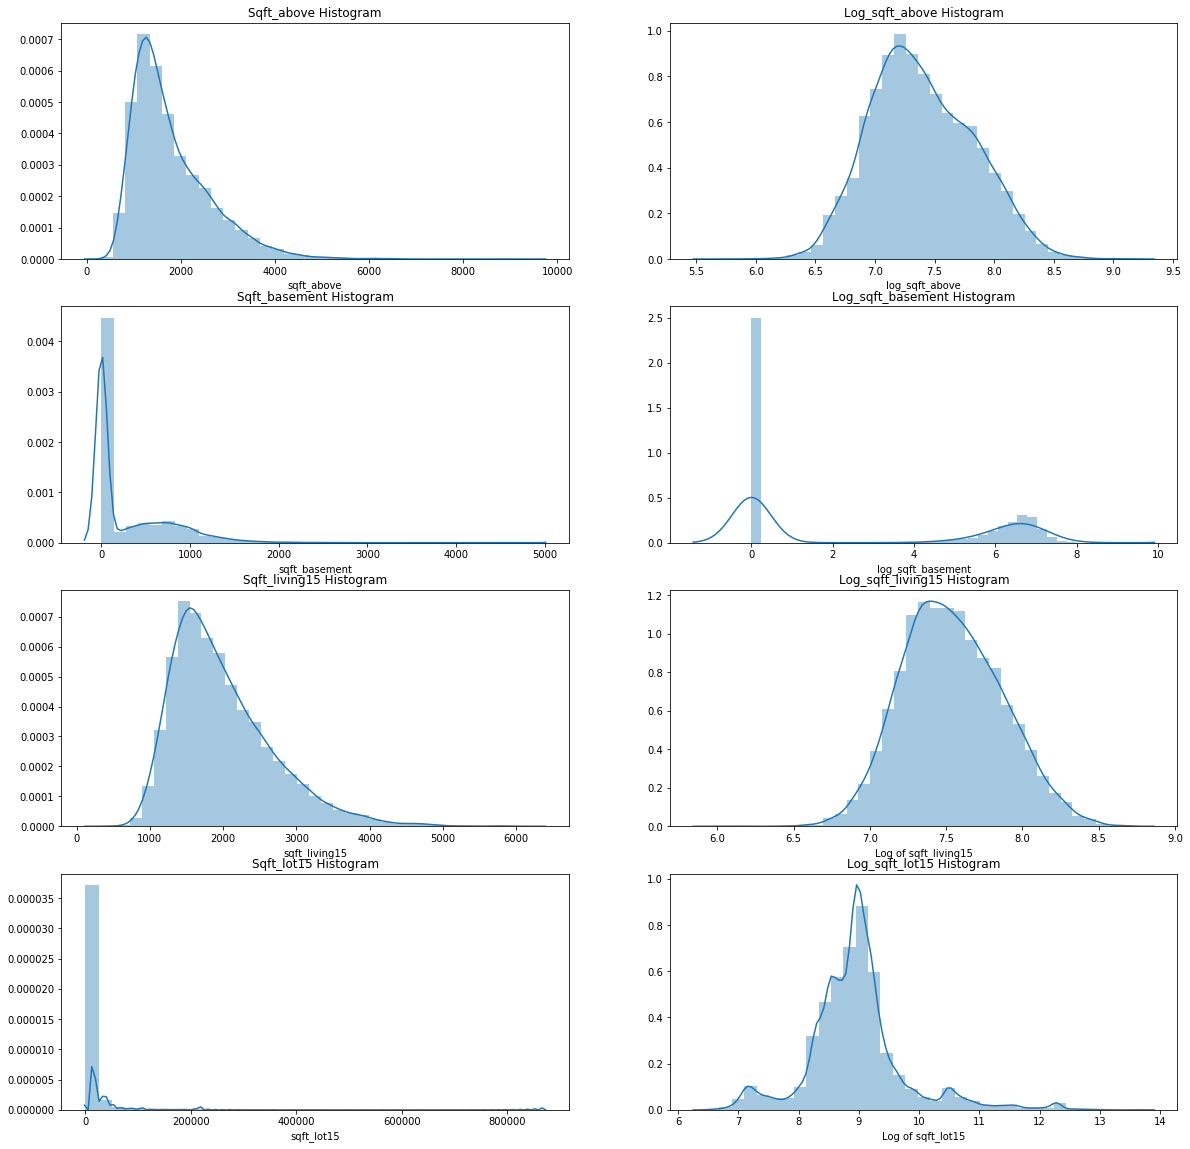

In [19]:
#Histgram and Density Curve 
#Right skewness reduced by logarithm
plt.figure(figsize=[20,20])

plt.subplot(421)
sns.distplot(train_data['sqft_above'], bins=35)
plt.title('Sqft_above Histogram')
plt.xlabel('sqft_above')

plt.subplot(422)
sns.distplot(train_data['log_sqft_above'], bins=35)
plt.title('Log_sqft_above Histogram')
plt.xlabel('log_sqft_above')

plt.subplot(423)
sns.distplot(train_data['sqft_basement'], bins=35)
plt.title('Sqft_basement Histogram')
plt.xlabel('sqft_basement')

plt.subplot(424)
sns.distplot(train_data['log_sqft_basement'], bins=35)
plt.title('Log_sqft_basement Histogram')
plt.xlabel('log_sqft_basement')

plt.subplot(425)
sns.distplot(train_data['sqft_living15'], bins=35)
plt.title('Sqft_living15 Histogram')
plt.xlabel('sqft_living15')

plt.subplot(426)
sns.distplot(train_data['log_sqft_living15'], bins=35)
plt.title('Log_sqft_living15 Histogram')
plt.xlabel('Log of sqft_living15')

plt.subplot(427)
sns.distplot(train_data['sqft_lot15'], bins=35)
plt.title('Sqft_lot15 Histogram')
plt.xlabel('sqft_lot15')

plt.subplot(428)
sns.distplot(train_data['log_sqft_lot15'], bins=35)
plt.title('Log_sqft_lot15 Histogram')
plt.xlabel('Log of sqft_lot15')

<Figure size 1440x1080 with 0 Axes>

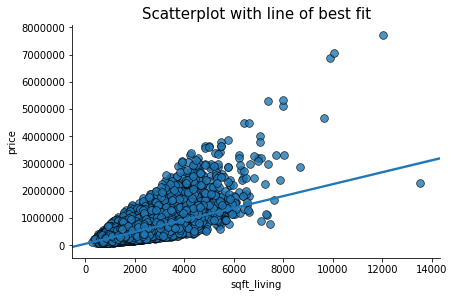

In [20]:
plt.figure(figsize=[20,15])
sns.lmplot(x="sqft_living", y="price", data=train_data, 
            height=4, aspect=1.6, robust=True, palette='tab10', 
            scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Scatterplot with line of best fit", fontsize=15)
plt.show()

<Figure size 1440x1080 with 0 Axes>

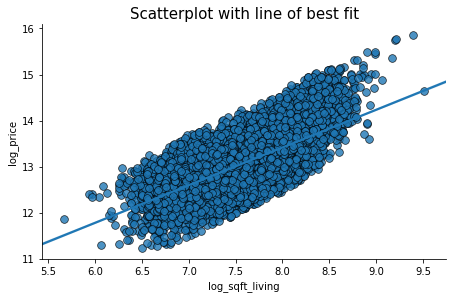

In [21]:
plt.figure(figsize=[20,15])
sns.lmplot(x="log_sqft_living", y="log_price", data=train_data, 
            height=4, aspect=1.6, robust=True, palette='tab10', 
            scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Scatterplot with line of best fit", fontsize=15)
plt.show()

In [22]:
feature_plot = train_data.columns
feature_plot

Index(['date', 'log_price', 'year', 'month', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'yr_old', 'log_sqft_living',
       'log_sqft_lot', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15',
       'log_sqft_basement'],
      dtype='object')

In [23]:
feature_plot = feature_plot.drop(['date','price','sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15',
       'sqft_lot15'])
feature_plot

Index(['log_price', 'year', 'month', 'bedrooms', 'bathrooms', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'lat', 'long', 'yr_old', 'log_sqft_living', 'log_sqft_lot',
       'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15',
       'log_sqft_basement'],
      dtype='object')

<Figure size 1800x1800 with 0 Axes>

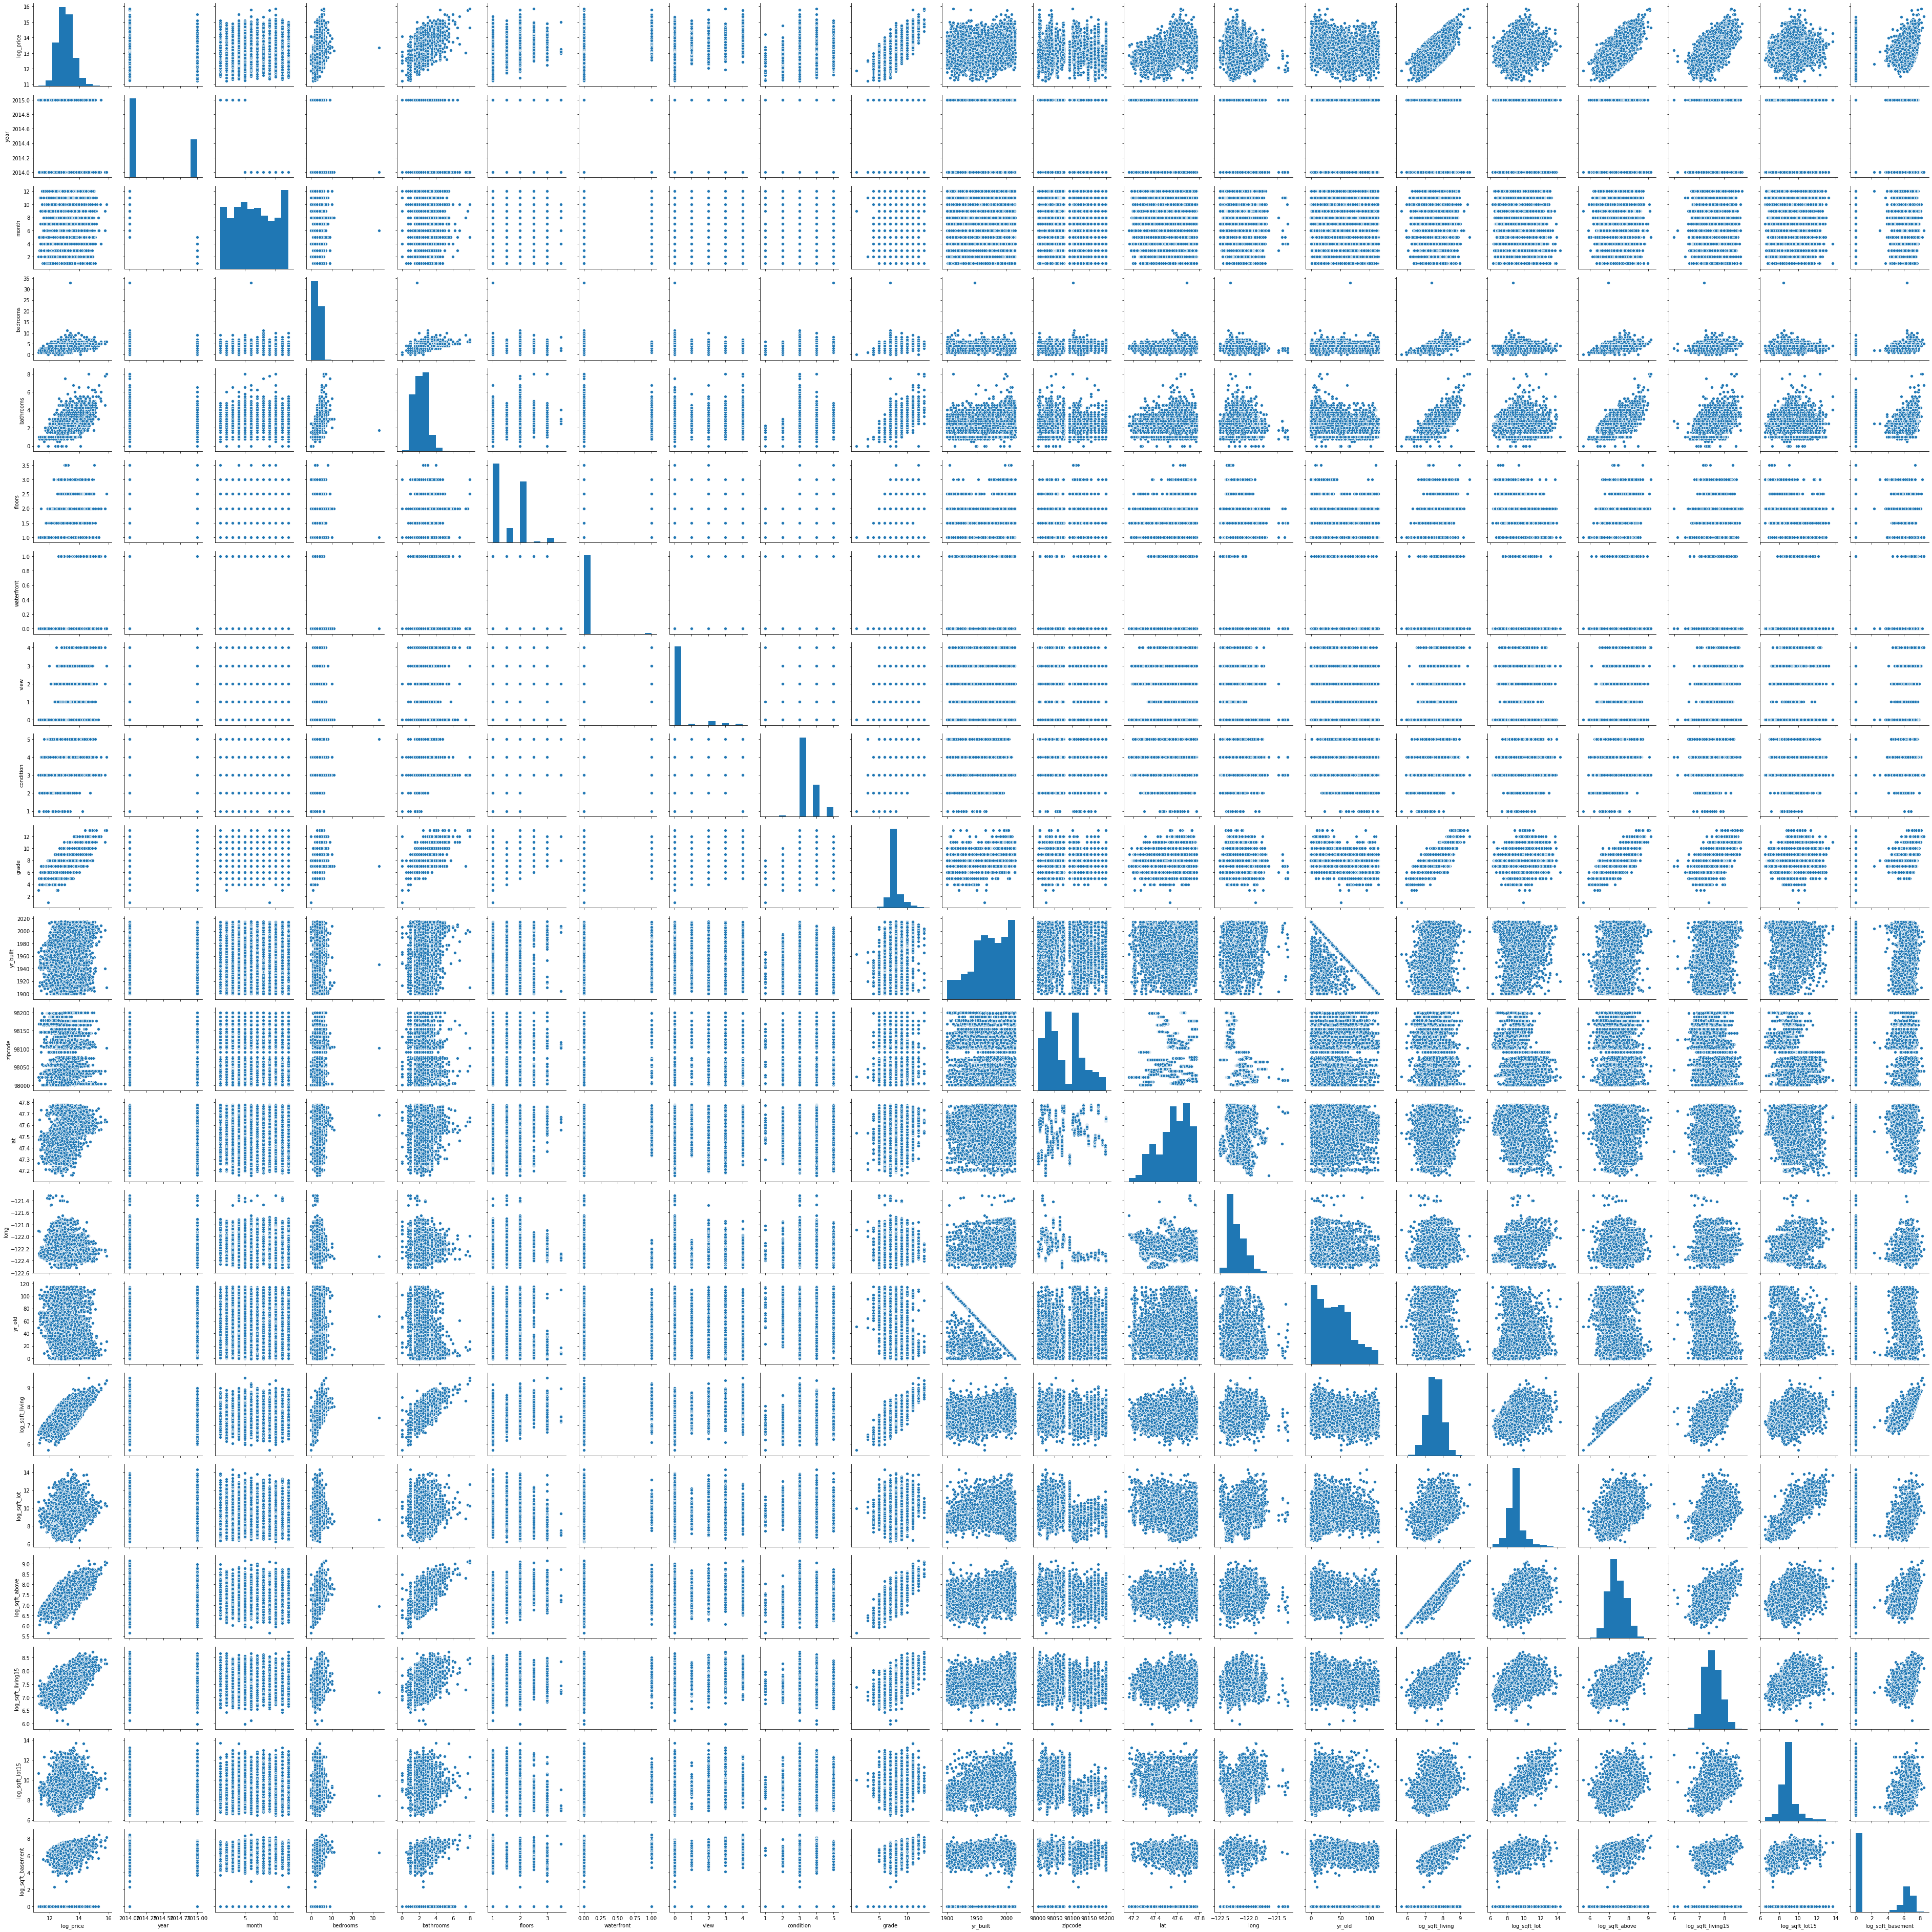

In [24]:
#Pair Plot
plt.figure(figsize=[25,25])
sns.pairplot(train_data[feature_plot])
plt.tight_layout()
plt.show()

In [25]:
#Correlation Table
corr = train_data[feature_plot].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Text(0, 0.5, 'Floors')

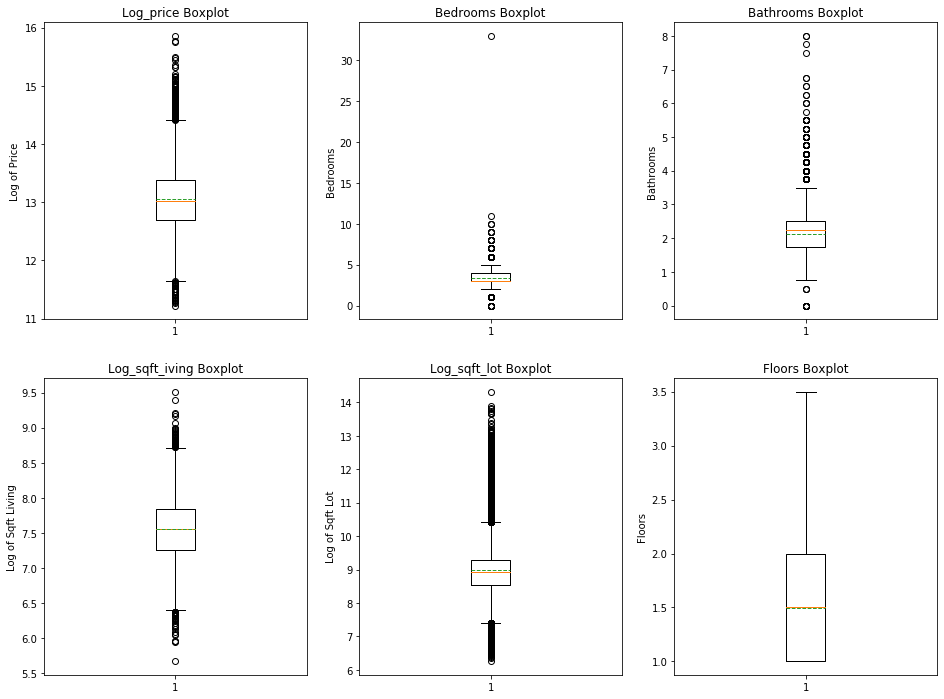

In [26]:
#Box Plots
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=train_data['log_price'], showmeans = True, meanline = True)
plt.title('Log_price Boxplot')
plt.ylabel('Log of Price')

plt.subplot(232)
plt.boxplot(x=train_data['bedrooms'], showmeans = True, meanline = True)
plt.title('Bedrooms Boxplot')
plt.ylabel('Bedrooms')

plt.subplot(233)
plt.boxplot(x=train_data['bathrooms'], showmeans = True, meanline = True)
plt.title('Bathrooms Boxplot')
plt.ylabel('Bathrooms')

plt.subplot(234)
plt.boxplot(x=train_data['log_sqft_living'], showmeans = True, meanline = True)
plt.title('Log_sqft_iving Boxplot')
plt.ylabel('Log of Sqft Living')

plt.subplot(235)
plt.boxplot(x=train_data['log_sqft_lot'], showmeans = True, meanline = True)
plt.title('Log_sqft_lot Boxplot')
plt.ylabel('Log of Sqft Lot')

plt.subplot(236)
plt.boxplot(x=train_data['floors'], showmeans = True, meanline = True)
plt.title('Floors Boxplot')
plt.ylabel('Floors')

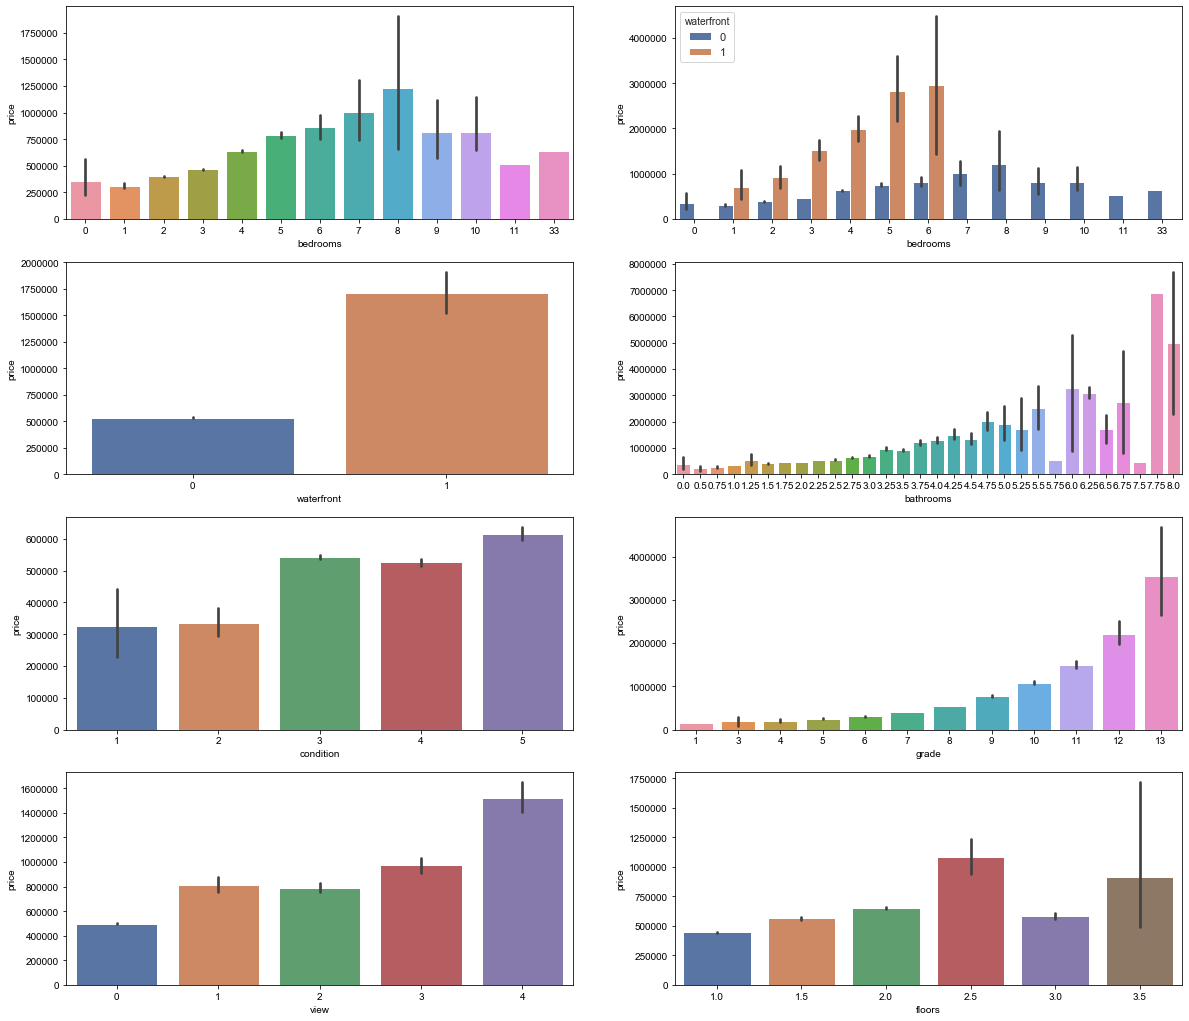

In [27]:
#Bar Plots
fig, saxis = plt.subplots(4, 2,figsize=(20,18))
sns.set(style="whitegrid")
sns.barplot(x = 'bedrooms', y = 'price',  data=train_data, ax = saxis[0,0])
sns.barplot(x = 'bedrooms', y = 'price', data=train_data, hue="waterfront", ax = saxis[0,1])
sns.barplot(x = 'waterfront', y = 'price', data=train_data, ax = saxis[1,0])
sns.barplot(x = 'bathrooms', y = 'price', data=train_data, ax = saxis[1,1])
sns.barplot(x = 'condition', y = 'price', data=train_data, ax = saxis[2,0])
sns.barplot(x = 'grade', y = 'price', data=train_data, ax = saxis[2,1])
sns.barplot(x = 'view', y = 'price', data=train_data, ax = saxis[3,0])
sns.barplot(x = 'floors', y = 'price', data=train_data, ax = saxis[3,1])

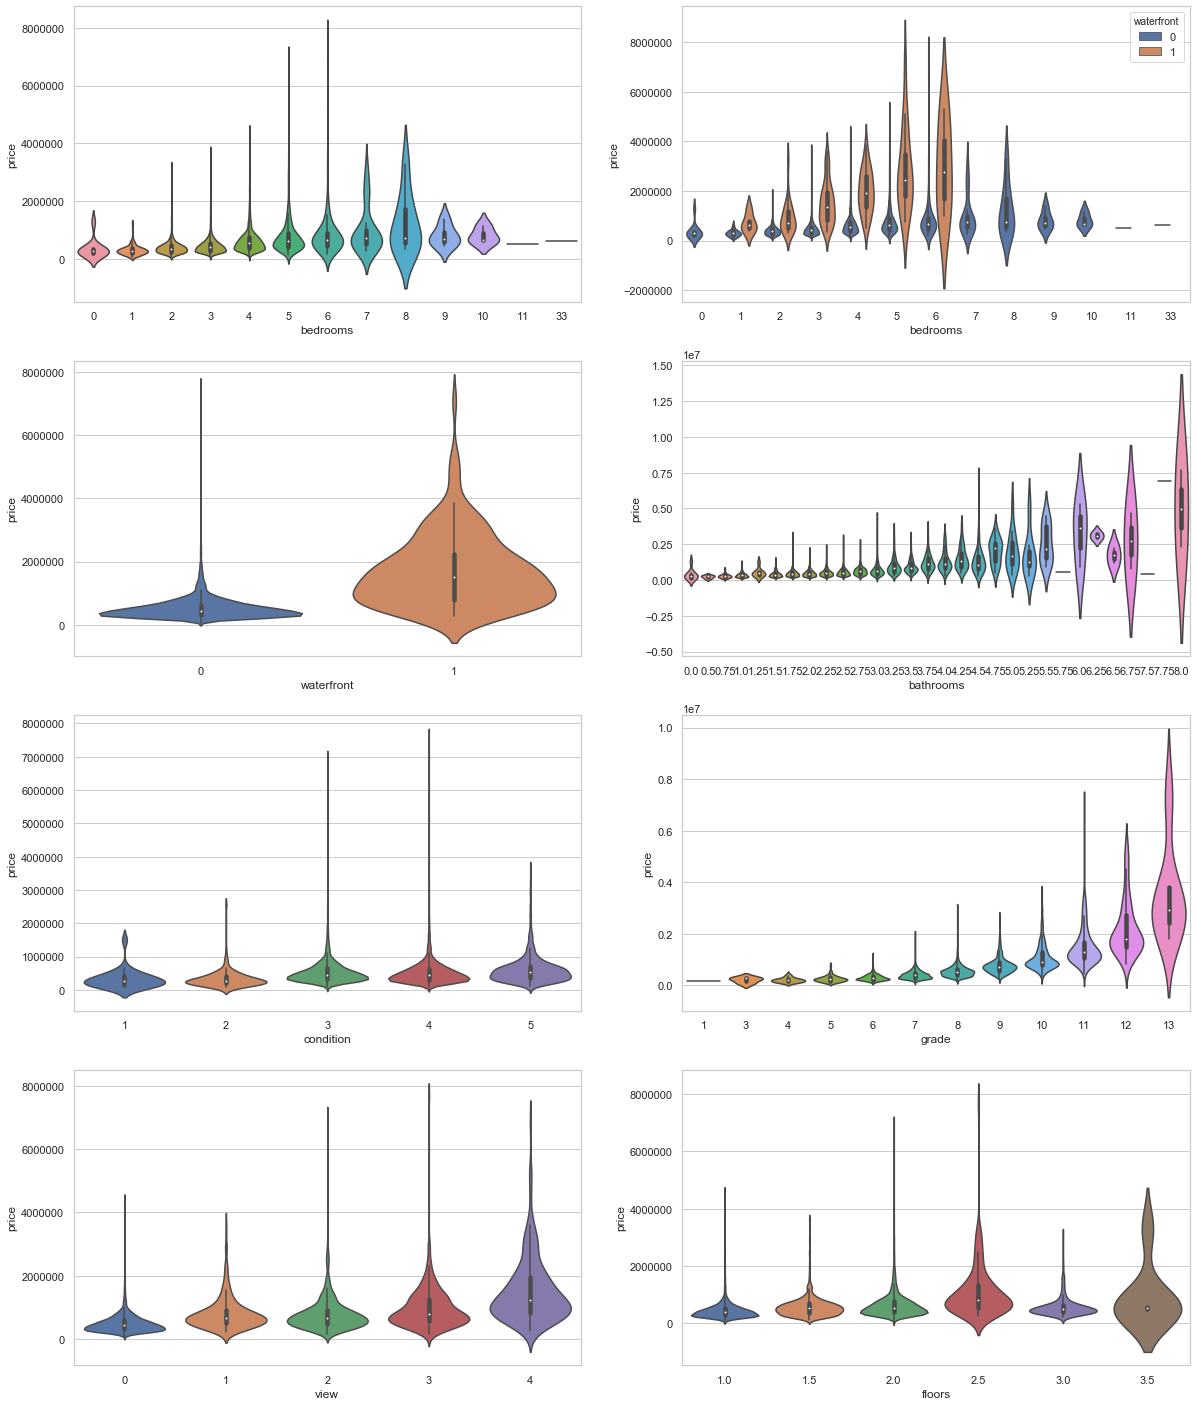

In [28]:
#Violin Plots
fig, saxis = plt.subplots(4, 2,figsize=(20,25))
sns.set(style="whitegrid")
sns.violinplot(x = 'bedrooms', y = 'price',  data=train_data, scale='width', ax = saxis[0,0])
sns.violinplot(x = 'bedrooms', y = 'price', data=train_data, scale='width', hue='waterfront', ax = saxis[0,1])
sns.violinplot(x = 'waterfront', y = 'price', data=train_data, scale='width', ax = saxis[1,0])
sns.violinplot(x = 'bathrooms', y = 'price', data=train_data, scale='width', ax = saxis[1,1])
sns.violinplot(x = 'condition', y = 'price', data=train_data, scale='width', ax = saxis[2,0])
sns.violinplot(x = 'grade', y = 'price', data=train_data, scale='width', ax = saxis[2,1])
sns.violinplot(x = 'view', y = 'price', data=train_data, scale='width', ax = saxis[3,0])
sns.violinplot(x = 'floors', y = 'price', data=train_data, scale='width', ax = saxis[3,1])

          Counts   Total Price  Average Price  Median Price
bedrooms                                                   
0             11  3.963550e+06   3.603227e+05      288000.0
1            166  5.165418e+07   3.111697e+05      292485.0
2           2260  9.040366e+08   4.000162e+05      370000.0
3           7832  3.668860e+09   4.684448e+05      415000.0
4           5439  3.479432e+09   6.397192e+05      550000.0
5           1307  1.033231e+09   7.905361e+05      620000.0
6            225  1.940621e+08   8.624981e+05      680000.0
7             32  3.225502e+07   1.007969e+06      738580.0
8              8  9.813000e+06   1.226625e+06      744000.0
9              5  4.083999e+06   8.167998e+05      700000.0
10             3  2.458000e+06   8.193333e+05      660000.0
11             1  5.200000e+05   5.200000e+05      520000.0
33             1  6.400000e+05   6.400000e+05      640000.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3cf9ce80>,
      dtype=object)

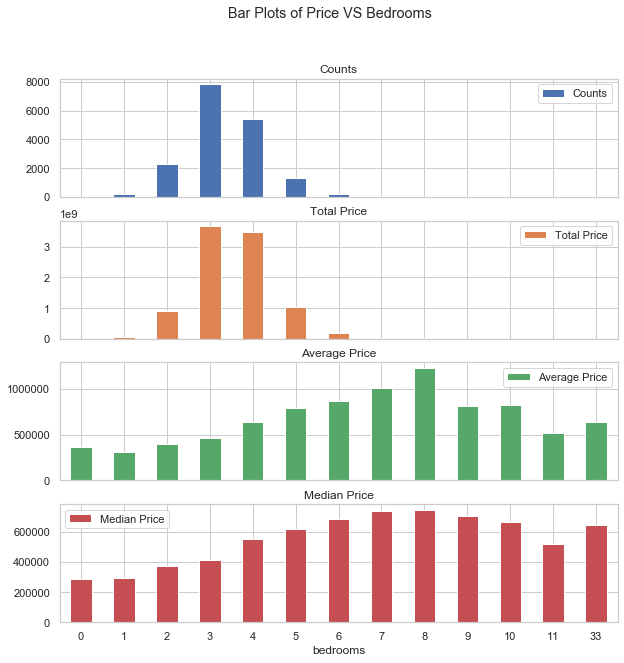

In [29]:
#Price VS Bedrooms
table_bedrooms = pd.pivot_table(train_data, values='price', index=['bedrooms'], aggfunc=['count', np.sum, np.mean, np.median])
table_bedrooms.columns = ['Counts', 'Total Price', 'Average Price', 'Median Price']
print(table_bedrooms)

#Bar Plots
table_bedrooms.plot.bar(subplots=True, figsize=(10, 10), title='Bar Plots of Price VS Bedrooms', rot=0)

           Counts   Total Price  Average Price  Median Price
bathrooms                                                   
0.00            9  3.386600e+06   3.762889e+05      280000.0
0.50            3  6.945000e+05   2.315000e+05      273000.0
0.75           57  1.619355e+07   2.840974e+05      250000.0
1.00         3070  1.061530e+09   3.457753e+05      319000.0
1.25            8  4.202950e+06   5.253688e+05      457000.0
1.50         1147  4.728159e+08   4.122197e+05      370000.0
1.75         2438  1.113282e+09   4.566373e+05      425000.0
2.00         1549  7.135093e+08   4.606257e+05      425000.0
2.25         1609  8.647880e+08   5.374693e+05      475000.0
2.50         4309  2.399204e+09   5.567890e+05      500000.0
2.75          972  6.376656e+08   6.560345e+05      600000.0
3.00          589  4.179412e+08   7.095776e+05      599950.0
3.25          468  4.548569e+08   9.719165e+05      828297.5
3.50          610  5.666179e+08   9.288819e+05      816250.0
3.75          129  1.561

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d36b630>,
      dtype=object)

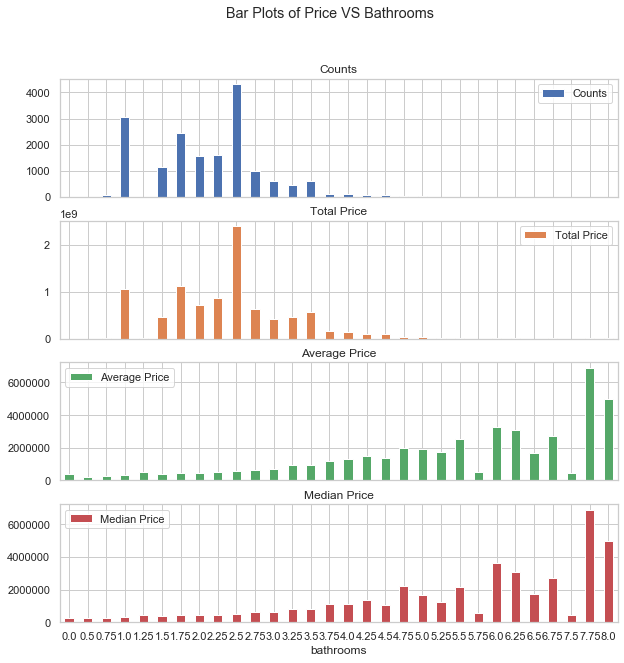

In [30]:
#Price VS Bathrooms
table_bathrooms = pd.pivot_table(train_data, values='price', index=['bathrooms'], aggfunc=['count', np.sum, np.mean, np.median])
table_bathrooms.columns = ['Counts', 'Total Price', 'Average Price', 'Median Price']
print(table_bathrooms)

#Bar Plots
table_bathrooms.plot.bar(subplots=True, figsize=(10, 10), title='Bar Plots of Price VS Bathrooms', rot=0)

       Counts   Total Price  Average Price  Median Price
grade                                                   
1           1  1.420000e+05   1.420000e+05      142000.0
3           3  6.170000e+05   2.056667e+05      262000.0
4          23  4.701050e+06   2.043935e+05      200000.0
5         196  4.919265e+07   2.509829e+05      228700.0
6        1623  4.903326e+08   3.021150e+05      275500.0
7        7137  2.884448e+09   4.041542e+05      375000.0
8        4910  2.677110e+09   5.452362e+05      515000.0
9        2090  1.618049e+09   7.741861e+05      720000.0
10        896  9.700700e+08   1.082667e+06      910000.0
11        331  4.967074e+08   1.500627e+06     1280000.0
12         68  1.509842e+08   2.220356e+06     1807500.0
13         12  4.265500e+07   3.554583e+06     2935500.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3d763dd8>,
      dtype=object)

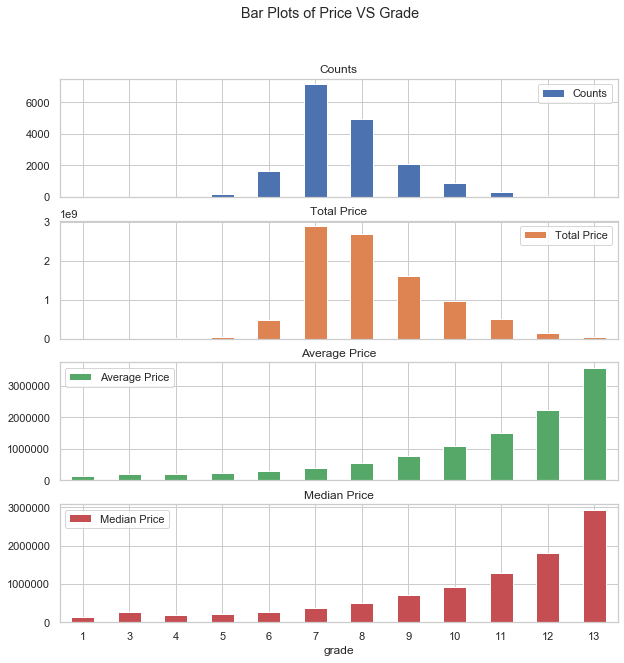

In [31]:
#Price VS Grade
table_grade = pd.pivot_table(train_data, values='price', index=['grade'], aggfunc=['count', np.sum, np.mean, np.median])
table_grade.columns = ['Counts', 'Total Price', 'Average Price', 'Median Price']
print(table_grade)

#Bar Plots
table_grade.plot.bar(subplots=True, figsize=(10, 10), title='Bar Plots of Price VS Grade', rot=0)

      Counts   Total Price  Average Price  Median Price
view                                                   
0      15557  7.745852e+09   4.979014e+05      435000.0
1        278  2.259379e+08   8.127262e+05      681500.0
2        788  6.213950e+08   7.885723e+05      671250.0
3        406  3.953570e+08   9.737856e+05      802500.0
4        261  3.964670e+08   1.519031e+06     1228000.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3dad9eb8>,
      dtype=object)

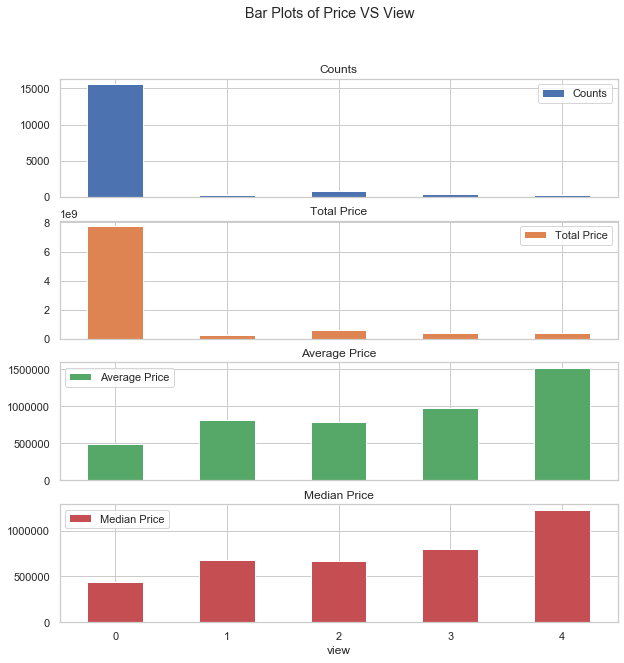

In [32]:
#Price VS View
table_view = pd.pivot_table(train_data, values='price', index=['view'], aggfunc=['count', np.sum, np.mean, np.median])
table_view.columns = ['Counts', 'Total Price', 'Average Price', 'Median Price']
print(table_view)

#Bar Plots
table_view.plot.bar(subplots=True, figsize=(10, 10), title='Bar Plots of Price VS View', rot=0)

        Counts   Total Price  Average Price  Median Price
floors                                                   
1.0       8496  3.767100e+09   4.433968e+05      390000.0
1.5       1549  8.712124e+08   5.624354e+05      525000.0
2.0       6588  4.293187e+09   6.516677e+05      545000.0
2.5        137  1.481532e+08   1.081410e+06      799200.0
3.0        513  2.989857e+08   5.828181e+05      495000.0
3.5          7  6.371500e+06   9.102143e+05      525000.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3de0a400>,
      dtype=object)

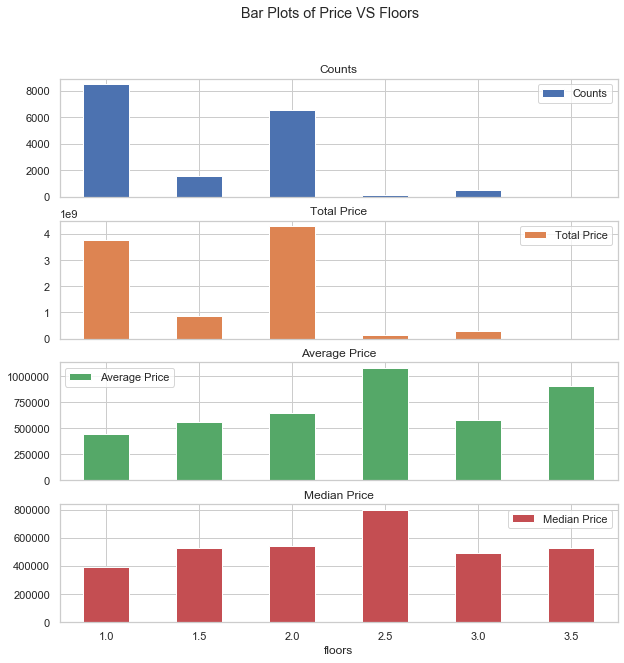

In [33]:
#Price VS Floors
table_floors = pd.pivot_table(train_data, values='price', index=['floors'], aggfunc=['count', np.sum, np.mean, np.median])
table_floors.columns = ['Counts', 'Total Price', 'Average Price', 'Median Price']
print(table_floors)

#Bar Plots
table_floors.plot.bar(subplots=True, figsize=(10, 10), title='Bar Plots of Price VS Floors', rot=0)

            Counts   Total Price  Average Price  Median Price
waterfront                                                   
0            17149  9.143877e+09   5.332018e+05      450000.0
1              141  2.411318e+08   1.710155e+06     1517000.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3e02c7f0>,
      dtype=object)

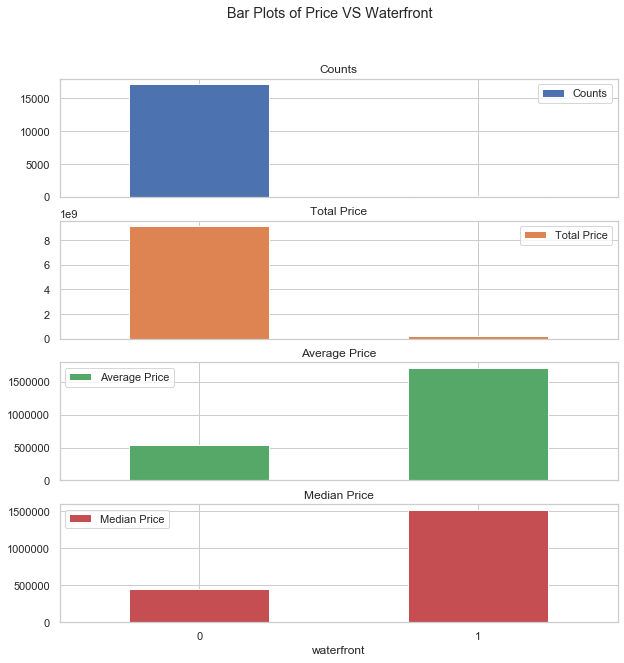

In [34]:
#Price VS Waterfront
table_waterfront = pd.pivot_table(train_data, values='price', index=['waterfront'], aggfunc=['count', np.sum, np.mean, np.median])
table_waterfront.columns = ['Counts', 'Total Price', 'Average Price', 'Median Price']
print(table_waterfront)

#Bar Plots
table_waterfront.plot.bar(subplots=True, figsize=(10, 10), title='Bar Plots of Price VS Waterfront', rot=0)

# 5. Time Series Data Analysis

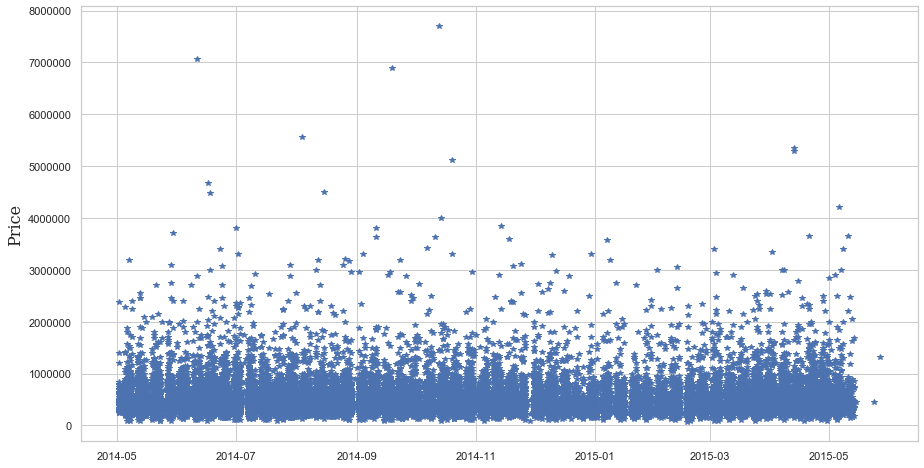

In [35]:
font = {'family': 'serif',
       'weight': 'normal',
       'size': 16,
       }
plt.figure(figsize=(15,8))
plt.plot(house.date, house['price'], 'b*')
plt.ylabel('Price', fontdict=font)
plt.show()

In [36]:
house['price/sf'] = house['price']/house['sqft_living']

In [37]:
feature_dic = {}
feature_dic['price/sf'] = np.mean
feature_dic['price'] = [np.mean,np.sum,'count']

In [38]:
table_date = pd.pivot_table(house, values=['price/sf','price'], index=['date'], aggfunc=feature_dic)

In [39]:
print(table_date.head())

           price                               price/sf
           count           mean         sum        mean
date                                                   
2014-05-02    67  526251.492537  35258850.0  256.754752
2014-05-03     4  466970.000000   1867880.0  341.411634
2014-05-04     5  576690.000000   2883450.0  227.328921
2014-05-05    84  580938.607143  48798843.0  274.633319
2014-05-06    83  534047.903614  44325976.0  260.049332


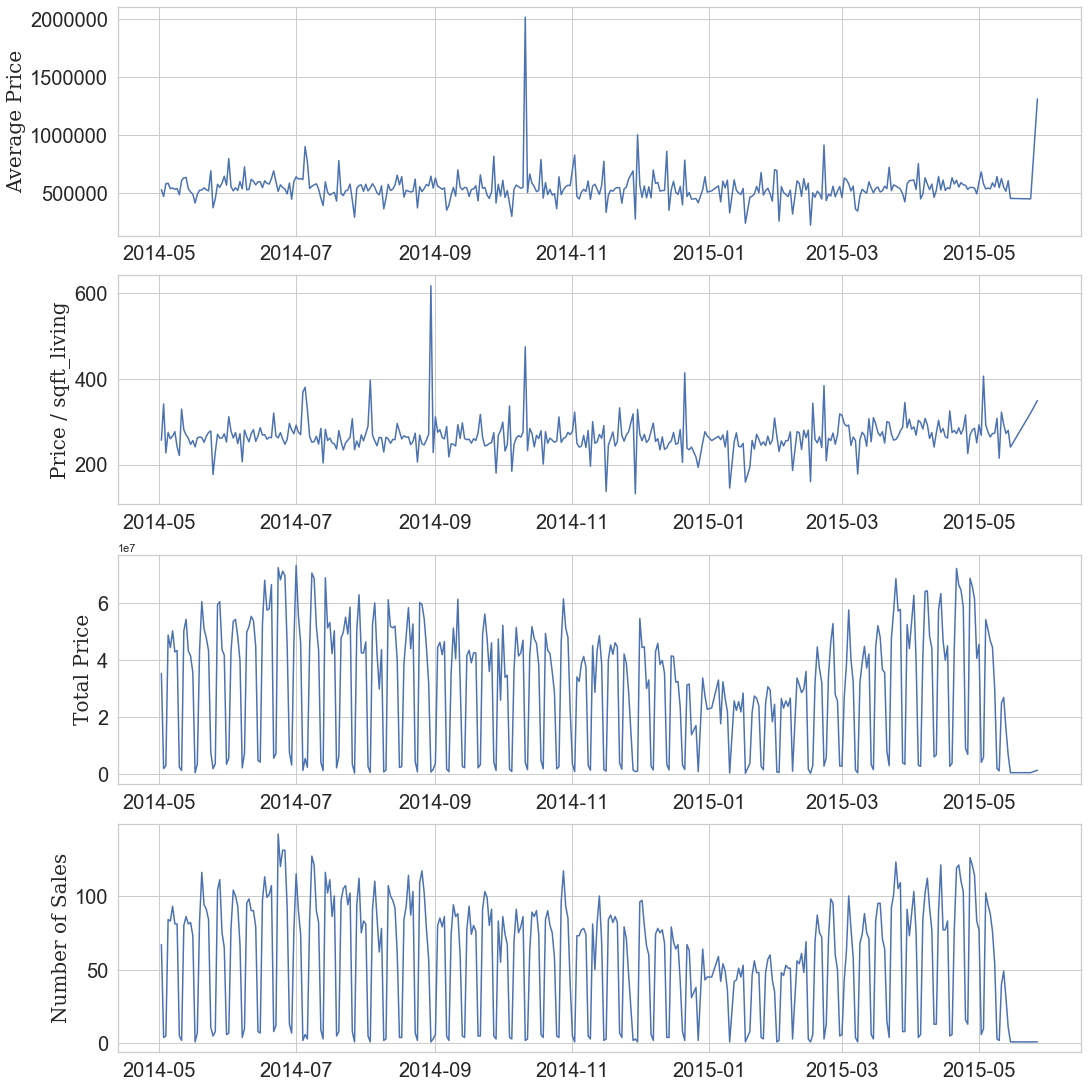

In [40]:
font = {'family': 'serif',
       'weight': 'normal',
       'size': 20,
       }

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, constrained_layout=True, figsize=(15,15))
ax0.plot(table_date['price']['mean'])
ax0.set_ylabel('Average Price', fontdict=font)
ax0.tick_params(axis='both', which='major', labelsize=20)
ax1.plot(table_date['price/sf']['mean'])
ax1.set_ylabel('Price / sqft_living', fontdict=font)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.plot(table_date['price']['sum'])
ax2.set_ylabel('Total Price', fontdict=font)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.plot(table_date['price']['count'])
ax3.set_ylabel('Number of Sales', fontdict=font)
ax3.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [41]:
table_month = pd.pivot_table(house, values=['price/sf','price'], index=['year','month'], aggfunc=feature_dic)

In [42]:
table_month

price                                 price/sf
           count           mean           sum        mean
year month                                               
2014 5      1768  548080.276584  9.690059e+08  263.485471
     6      2180  558002.199541  1.216445e+09  264.820869
     7      2211  544788.764360  1.204528e+09  259.663075
     8      1940  536445.276804  1.040704e+09  259.835918
     9      1774  529253.821871  9.388963e+08  259.670146
     10     1878  539026.971778  1.012293e+09  262.770101
     11     1411  521961.009213  7.364870e+08  258.535804
     12     1471  524461.866757  7.714834e+08  254.580748
2015 1       978  525870.889571  5.143017e+08  256.747731
     2      1250  507851.371200  6.348142e+08  259.595072
     3      1875  543977.187200  1.019957e+09  273.788626
     4      2231  561837.774989  1.253460e+09  278.696695
     5       646  558126.811146  3.605499e+08  284.410837

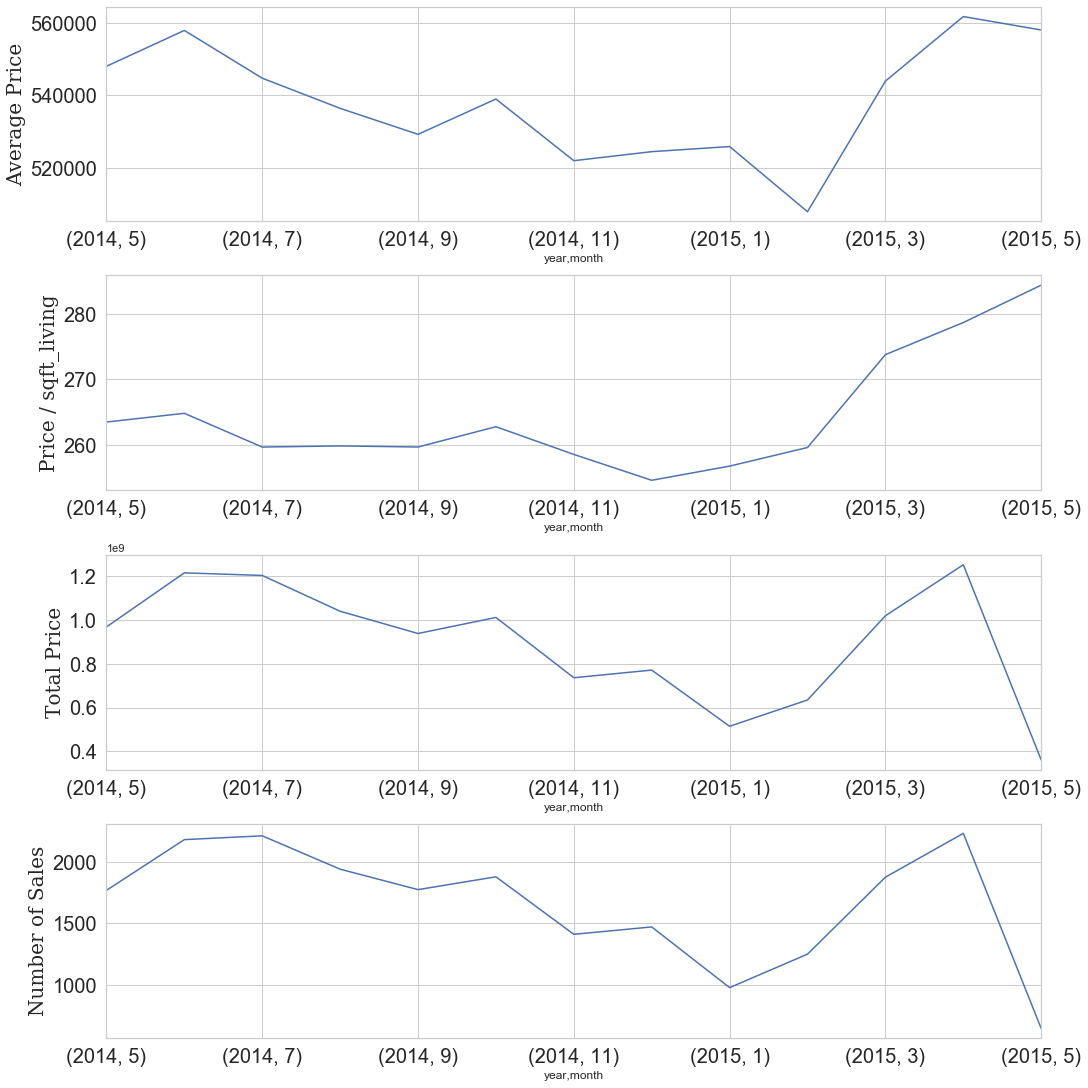

In [43]:
font = {'family': 'serif',
       'weight': 'normal',
       'size': 20,
       }

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, constrained_layout=True, figsize=(15,15))
table_month['price']['mean'].plot(ax=ax0)
ax0.set_ylabel('Average Price', fontdict=font)
ax0.tick_params(axis='both', which='major', labelsize=20)
table_month['price/sf']['mean'].plot(ax=ax1)
ax1.set_ylabel('Price / sqft_living', fontdict=font)
ax1.tick_params(axis='both', which='major', labelsize=20)
table_month['price']['sum'].plot(ax=ax2)
ax2.set_ylabel('Total Price', fontdict=font)
ax2.tick_params(axis='both', which='major', labelsize=20)
table_month['price']['count'].plot(ax=ax3)
ax3.set_ylabel('Number of Sales', fontdict=font)
ax3.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# 6. Machine Learning Models

In [44]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Machine learning models
n_trees = 100
Models = [
    #Linear Models
    LinearRegression(),
    LassoCV(),
    RidgeCV(),
    ElasticNetCV(),
    
    #Non-linear Models
    KNeighborsRegressor(n_neighbors=4, weights = 'distance'),
    DecisionTreeRegressor(random_state = 0),
    
    #Ensemble Models
    BaggingRegressor(n_estimators=n_trees, random_state = 0),
    RandomForestRegressor(n_estimators=n_trees, random_state = 0),
    GradientBoostingRegressor(n_estimators=n_trees, random_state = 0)
    ]

In [46]:
#Cross-validation
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)

#Create table to compare models
Models_columns = ['Models Name', 'Models Parameters','Models Train Score Mean', 'Models Test Score Mean', 'Models Test Score 3*STD' ,'Models Time']
Models_compare = pd.DataFrame(columns = Models_columns)

In [47]:
features_sel = train_data.columns
features_sel

Index(['date', 'log_price', 'year', 'month', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'yr_old', 'log_sqft_living',
       'log_sqft_lot', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15',
       'log_sqft_basement'],
      dtype='object')

In [48]:
features_sel = features_sel.drop(['date','price','sqft_living','sqft_lot','sqft_above','sqft_basement',
                                 'sqft_living15','sqft_lot15','log_price']
                                )
#features_sel = features_sel.drop(['date','price','log_sqft_living','log_sqft_lot','log_sqft_above','log_sqft_basement',
#                                'log_sqft_living15','log_sqft_lot15','log_price']
#                                )
features_sel
target = 'log_price'

In [49]:
row_index = 0
for alg in Models:
    Models_name = alg.__class__.__name__
    Models_compare.loc[row_index, 'Models Name'] = Models_name
    Models_compare.loc[row_index, 'Models Parameters'] = str(alg.get_params())
    
    #Score model with cross validation
    cv_results = model_selection.cross_validate(alg, train_data[features_sel], train_data[target], cv = cv_split, scoring='r2', return_train_score=True)

    Models_compare.loc[row_index, 'Models Time'] = cv_results['fit_time'].mean()
    Models_compare.loc[row_index, 'Models Train Score Mean'] = cv_results['train_score'].mean()
    Models_compare.loc[row_index, 'Models Test Score Mean'] = cv_results['test_score'].mean()   
    Models_compare.loc[row_index, 'Models Test Score 3*STD'] = cv_results['test_score'].std()*3   
    
    row_index+=1

    
#print and sort table
Models_compare.sort_values(by = ['Models Test Score Mean'], ascending = False, inplace = True)
Models_compare

Models Name  \
6           BaggingRegressor   
7      RandomForestRegressor   
8  GradientBoostingRegressor   
0           LinearRegression   
2                    RidgeCV   
1                    LassoCV   
3               ElasticNetCV   
5      DecisionTreeRegressor   
4        KNeighborsRegressor   

                                   Models Parameters Models Train Score Mean  \
6  {'base_estimator': None, 'bootstrap': True, 'b...                0.983226   
7  {'bootstrap': True, 'criterion': 'mse', 'max_d...                0.983235   
8  {'alpha': 0.9, 'criterion': 'friedman_mse', 'i...                 0.89428   
0  {'copy_X': True, 'fit_intercept': True, 'n_job...                0.775438   
2  {'alphas': array([ 0.1,  1. , 10. ]), 'cv': No...                0.775438   
1  {'alphas': None, 'copy_X': True, 'cv': 'warn',...                0.771506   
3  {'alphas': None, 'copy_X': True, 'cv': 'warn',...                0.768001   
5  {'criterion': 'mse', 'max_depth': None, 'max_f...                       1   
4  {'algorithm': 'auto', 'leaf_size': 30, 'metric...                       1   

  Models Test Score Mean Models Test Score 3*STD Models Time  
6               0.883308              0.00890575     9.85283  
7               0.883142              0.00881529     9.68749  
8               0.880474              0.00617311    0.952849  
0               0.776085              0.00662799   0.0106897  
2               0.776085              0.00662403   0.0238424  
1               0.772458              0.00690059    0.229183  
3               0.768866              0.00790633    0.216306  
5               0.757322               0.0257294    0.158329  
4               0.568545               0.0341164   0.0125827

# 7. Hyperparameter Tuning
   Perform hyperparameter tuning on the models to further improve the performance. 

In [50]:
#Grid Search Parameters
grid_n_estimator = [100, 300]
grid_ratio = [0.75, 1.0]
grid_learn = [0.05, 0.1]
grid_max_depth = [3, 6, 9, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['mse', 'mae']
grid_bool = [True, False]
grid_seed = [0]

In [51]:
#Models to tune
Models_tune = {'DecisionTreeRegressor':DecisionTreeRegressor(random_state = 0),
                'BaggingRegressor': BaggingRegressor(random_state = 0),
                'RandomForestRegressor': RandomForestRegressor(random_state = 0),
                'GradientBoostingRegressor': GradientBoostingRegressor(random_state = 0)
              }

#Grid search parameters
grid_param = {}
#DecisionTreeRegressor
grid_param['DecisionTreeRegressor'] = {#'criterion': grid_criterion,  
                                        #'splitter': ['best', 'random'],
                                        'max_depth': grid_max_depth, #default=None
                                        #'min_samples_split': [2,5,10,.03,.05], 
                                        'min_samples_leaf': grid_min_samples, #default=1
                                        #'max_features': [None, 'auto'], 
                                        'random_state': grid_seed 
                                         }
#BaggingRegressor
grid_param['BaggingRegressor'] = {'n_estimators':grid_n_estimator, #default=10
                                    'max_samples': grid_ratio, #default=1.0
                                    'oob_score': [True], #default=False
                                    'random_state': grid_seed
                                 }
#RandomForestRegressor
grid_param['RandomForestRegressor'] = {'n_estimators': grid_n_estimator, #default=10
                                        'max_depth': grid_max_depth, #default=None
                                        'oob_score': [True], #default=False 
                                        'random_state': grid_seed
                                         }
#GradientBoostingRegressor
grid_param['GradientBoostingRegressor'] = {'learning_rate': [.05], #default=0.1 
                                            'n_estimators': [300], #default=100 
                                            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
                                            'max_depth': grid_max_depth, #default=3   
                                            'random_state': grid_seed
                                             }      

In [52]:
best_model_score = 0
best_model_name = ''
best_model_para = {}

for i in Models_tune:
    #Base model with default settings
    base_results = model_selection.cross_validate(Models_tune[i], train_data[features_sel], train_data[target], scoring = 'r2', cv  = cv_split, return_train_score=True)
    print('='*30)
    print('For '+i+': ')
    print('Before Parameters Tuning Parameters: ', Models_tune[i].get_params()),
    print("Before Parameters Tuning Training Score Mean: {:.4f}". format(base_results['train_score'].mean())) 
    print("Before Parameters Tuning Test Score Mean: {:.4f}". format(base_results['test_score'].mean()))
    print("Before Parameters Tuning Test Score 3*STD: +/- {:.4f}". format(base_results['test_score'].std()*3))
    print('-'*30)
    
    #Choose best model with grid_search: 
    tune_model = model_selection.GridSearchCV(Models_tune[i], param_grid=grid_param[i], scoring = 'r2', cv = cv_split, return_train_score=True)
    tune_model.fit(train_data[features_sel], train_data[target])
    print('After Parameters Tuning Best Parameters: ', tune_model.best_params_)
    print("After Parameters Tuning Training Score Mean: {:.4f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_])) 
    print("After Parameters Tuning Test Score Mean: {:.4f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]))
    print("After Parameters Tuning Test Score 3*STD: +/- {:.4f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*3))
    print('-'*30)
    
    if tune_model.cv_results_['mean_test_score'][tune_model.best_index_]>best_model_score:
        best_model_name = i
        best_model_para = tune_model.best_params_
        best_model_score = tune_model.cv_results_['mean_test_score'][tune_model.best_index_]
        best_model = tune_model
print('Best Model is: ', best_model_name)
print('Best Model Test Score is: ', best_model_score)
print('Best Model Parameters are: ',best_model_para)

For DecisionTreeRegressor: 
Before Parameters Tuning Parameters:  {'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
Before Parameters Tuning Training Score Mean: 1.0000
Before Parameters Tuning Test Score Mean: 0.7573
Before Parameters Tuning Test Score 3*STD: +/- 0.0257
------------------------------
After Parameters Tuning Best Parameters:  {'max_depth': None, 'min_samples_leaf': 10, 'random_state': 0}
After Parameters Tuning Training Score Mean: 0.9117
After Parameters Tuning Test Score Mean: 0.8204
After Parameters Tuning Test Score 3*STD: +/- 0.0092
------------------------------
For BaggingRegressor: 
Before Parameters Tuning Parameters:  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n

# 8. Evaluation on Test Data

In [53]:
prediction = best_model.predict(test_x[features_sel])
e_prediction = np.exp(prediction)
e_test_y = np.exp(test_y)
test_score_r2 = r2_score(e_test_y, e_prediction)
test_score_rmse = np.sqrt(mean_squared_error(e_test_y, e_prediction))
test_score_mae = mean_absolute_error(e_test_y, e_prediction)
print('The test R2 score is: ', test_score_r2)
print('The test RMSE score is: ', test_score_rmse)
print('The test MAE score is: ', test_score_mae)

The test R2 score is:  0.9047751886687124
The test RMSE score is:  106416.82717730598
The test MAE score is:  59913.34264944352


In [54]:
test_data = pd.DataFrame(test_y)

In [55]:
test_data['price'] = np.exp(test_data['log_price'])
test_data['predictions'] = np.exp(prediction)
test_data.head()

log_price      price   predictions
17384  12.601487   297000.0  3.203014e+05
722    14.271669  1578000.0  1.625282e+06
2680   13.239435   562100.0  5.010003e+05
18754  13.355853   631500.0  5.905041e+05
14554  13.567049   780000.0  6.881468e+05

# 9. Next Steps to Improve

### 1) Feature Engineering
   Explore feature engineering (feature selection, feature transformation, feature extraction), especially make more use of location-related features to further improve the performance. We can use clustering algorithm like k-Nearest Neighbor algorithm to group the geo-location data, and use the unique cluster id as a new feature to replace the original geo-location features: 'zipcode', 'lat', 'long', in the machine learning models. We also need to to take care outliers.

#### Feature Selection
Recursive Feature Elimination (RFE) with Cross Validation (CV).

In [56]:
#RFE with CV
dtree = DecisionTreeRegressor(random_state = 0)
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'r2', cv = cv_split)
dtree_rfe.fit(train_data[features_sel], train_data[target])

#Use reduced features to fit new model
features_rfe = train_data[features_sel].columns.values[dtree_rfe.get_support()]
dt_rfe_results = model_selection.cross_validate(dtree, train_data[features_rfe], train_data[target], scoring = 'r2', cv  = cv_split, return_train_score=True)
print('Before Decision Tree RFE Training Shape: ', train_data[features_sel].shape) 
print('After Decision Tree RFE Training Shape: ', train_data[features_rfe].shape) 
print('After Decision Tree RFE Training Columns: ', features_rfe)
print("After Decision Tree RFE Training Score Mean: {:.4f}". format(dt_rfe_results['train_score'].mean())) 
print("After Decision Tree RFE Test Score Mean: {:.4f}". format(dt_rfe_results['test_score'].mean()))
print("After Decision Tree RFE Test Score 3*STD: +/- {:.4f}". format(dt_rfe_results['test_score'].std()*3))
print('-'*30)

#Tune RFE model
dt_rfe_tune_model = model_selection.GridSearchCV(dtree, param_grid=grid_param['DecisionTreeRegressor'], scoring = 'r2', cv = cv_split, return_train_score=True)
dt_rfe_tune_model.fit(train_data[features_rfe], train_data[target])
print('After Decision Tree RFE Tuned Parameters: ', dt_rfe_tune_model.best_params_)
print("After Decision Tree RFE Tuned Training Score Mean: {:.4f}". format(dt_rfe_tune_model.cv_results_['mean_train_score'][dt_rfe_tune_model.best_index_])) 
print("After Decision Tree RFE Tuned Test Score Mean: {:.4f}". format(dt_rfe_tune_model.cv_results_['mean_test_score'][dt_rfe_tune_model.best_index_]))
print("After Decision Tree RFE Tuned Test Score 3*STD: +/- {:.4f}". format(dt_rfe_tune_model.cv_results_['std_test_score'][dt_rfe_tune_model.best_index_]*3))
print('-'*30)

Before Decision Tree RFE Training Shape:  (17290, 20)
After Decision Tree RFE Training Shape:  (17290, 15)
After Decision Tree RFE Training Columns:  ['month' 'bathrooms' 'waterfront' 'view' 'grade' 'yr_built' 'zipcode'
 'lat' 'long' 'yr_old' 'log_sqft_living' 'log_sqft_lot' 'log_sqft_above'
 'log_sqft_living15' 'log_sqft_lot15']
After Decision Tree RFE Training Score Mean: 1.0000
After Decision Tree RFE Test Score Mean: 0.7535
After Decision Tree RFE Test Score 3*STD: +/- 0.0271
------------------------------
After Decision Tree RFE Tuned Parameters:  {'max_depth': None, 'min_samples_leaf': 10, 'random_state': 0}
After Decision Tree RFE Tuned Training Score Mean: 0.9104
After Decision Tree RFE Tuned Test Score Mean: 0.8216
After Decision Tree RFE Tuned Test Score 3*STD: +/- 0.0112
------------------------------


### 2) Neural Network Models

Try neural network models to see whether they can improve the performance.